Оценка только при помощи подсчета простейших статистик не дает полной картины происходящего.

In [1]:
from IPython.core.display import Image
import pandas
from sklearn import datasets
from scipy.stats import gaussian_kde
import seaborn as sns
from matplotlib.colors import ListedColormap
from numpy import *
from matplotlib.pyplot import *


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Квартет Энскомба

Подробнее, см. на Википедии.

Наборы данных имеют одинаковое среднее, дисперсию, коэффициент корреляции между признаками. При визуализации на плоскости оказывается, что они имеют принципиально разный характер.


In [2]:
A = array([
[10.0, 8.04, 10.0, 9.14, 10.0, 7.46, 8.0, 6.58],
[8.0, 6.95, 8.0, 8.14, 8.0, 6.77, 8.0, 5.76],
[13.0, 7.58, 13.0, 8.74, 13.0, 12.74, 8.0, 7.71],
[9.0, 8.81, 9.0, 8.77, 9.0, 7.11, 8.0, 8.84],
[11.0, 8.33, 11.0, 9.26, 11.0, 7.81, 8.0, 8.47],
[14.0, 9.96, 14.0, 8.10, 14.0, 8.84, 8.0, 7.04],
[6.0, 7.24, 6.0, 6.13, 6.0, 6.08, 8.0, 5.25],
[4.0, 4.26, 4.0, 3.10, 4.0, 5.39, 19.0, 12.50],
[12.0, 10.84, 12.0, 9.13, 12.0, 8.15, 8.0, 5.56],
[7.0, 4.82, 7.0, 7.26, 7.0, 6.42, 8.0, 7.91],
[5.0, 5.68, 5.0, 4.74, 5.0, 5.73, 8.0, 6.89],
])
data = [A[:, :2], A[:, 2:4], A[:, 4:6], A[:, 6:]]

In [3]:
for idx, X in enumerate(data):
    print ('X%d' % (idx+1))
    print ('  Mean:', mean(X, axis=0))
    print ('  Std:', std(X, axis=0))
    print ('  Pearson correlation:', corrcoef(X.T)[0, 1])

X1
  Mean: [9.         7.50090909]
  Std: [3.16227766 1.93702422]
  Pearson correlation: 0.81642051634484
X2
  Mean: [9.         7.50090909]
  Std: [3.16227766 1.93710869]
  Pearson correlation: 0.8162365060002428
X3
  Mean: [9.  7.5]
  Std: [3.16227766 1.93593294]
  Pearson correlation: 0.8162867394895982
X4
  Mean: [9.         7.50090909]
  Std: [3.16227766 1.93608065]
  Pearson correlation: 0.8165214368885028


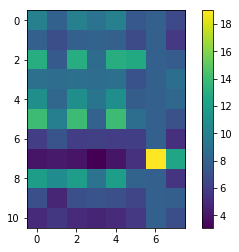

In [4]:
imshow(A, interpolation='none')
colorbar()

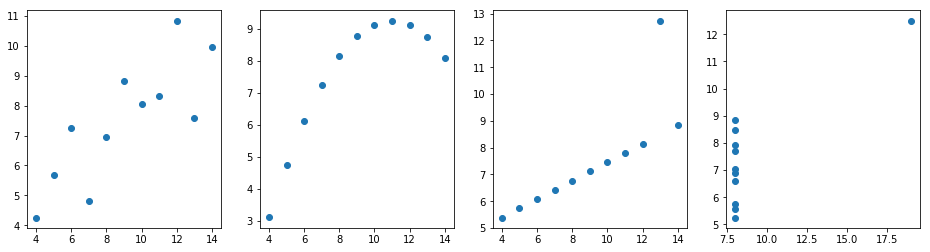

In [5]:
figure(figsize=(16, 4))
for idx, X in enumerate(data):
    subplot(1, 4, idx+1)
    scatter(X[:, 0], X[:, 1])

Потому, например, подсчитав качество работы алгоритма или сделав какую-либо другую оценку хорошо бы понять, насколько наша оценка может отличаться от реальной картины происходящего. В простейшем случае -- визуально

#### Пример оценки гиперпараметров

Рассмотрим "визуальную" оценку на примере подбора оптимальных гиперпараметров. Предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k.

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
# Назначаем имена колонок
columns = ('age workclass fnlwgt education educ-num marital-status occupation relationship '
           'race sex capital-gain capital-loss  hours-per-week native-country salary')

numeric_indices = np.array([0, 2, 4, 10, 11, 12])
categorical_indices = np.array([1, 3, 5, 6, 7, 8, 9, 13])

df.columns = columns.split() #этот метод разделит датасет по колонкам как в массиве columns

df = df.replace('?', np.nan)

df = df.dropna()

df['salary'] = df['salary'].apply((lambda x: x==' >50K')) # Будем предсказывать 1(True), если зарплата больше 50K, 0(False) иначе

In [8]:
numeric_data = df[df.columns[numeric_indices]]

categorial_data = df[df.columns[categorical_indices]]
dummy_features = pd.get_dummies(categorial_data)

In [9]:
X = pd.concat([numeric_data, dummy_features], axis=1)
X.head()

,age,fnlwgt,educ-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
y = df['salary']

Теперь всё готово для обучения алгоритмов.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8)

Напишем функцию, визуализирующую поиск оптимального гиперпараметра модели по сетке. 

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
def search_and_draw(X, y, model, param_name, grid, param_scale='ordinary', draw=True):
    parameters = {param_name: grid}
    
    CV_model = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='roc_auc', n_jobs=-1)
    CV_model.fit(X, y)
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']
    
    if draw:
        plt.figure(figsize=(15,8))
        plt.title('choose ' + param_name)


        if (param_scale == 'log'):
            plt.xscale('log')

        plt.plot(grid, means, label='mean values of score')

        plt.fill_between(grid, means - 2 * error, means + 2 * error, color='green', label='filled area between errors', alpha=0.2)
        plt.legend()
        plt.xlabel('parameter')
        plt.ylabel('roc_auc')
        plt.show()
        
    return means, error

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [16]:
models = [KNeighborsClassifier(), DecisionTreeClassifier()]
param_names = ['n_neighbors', 'max_depth']
grids = [np.array(np.linspace(2, 100, 10), dtype='int'), np.arange(1, 21)]
param_scales = ['log', 'ordinary']

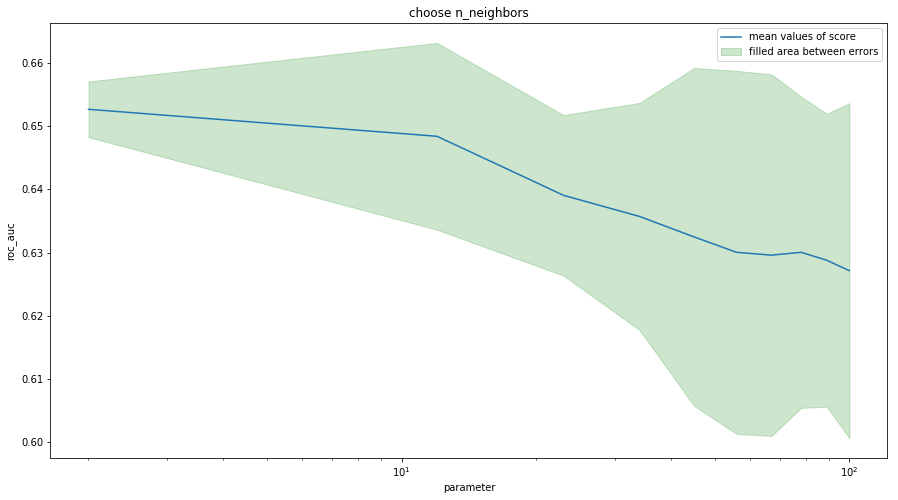

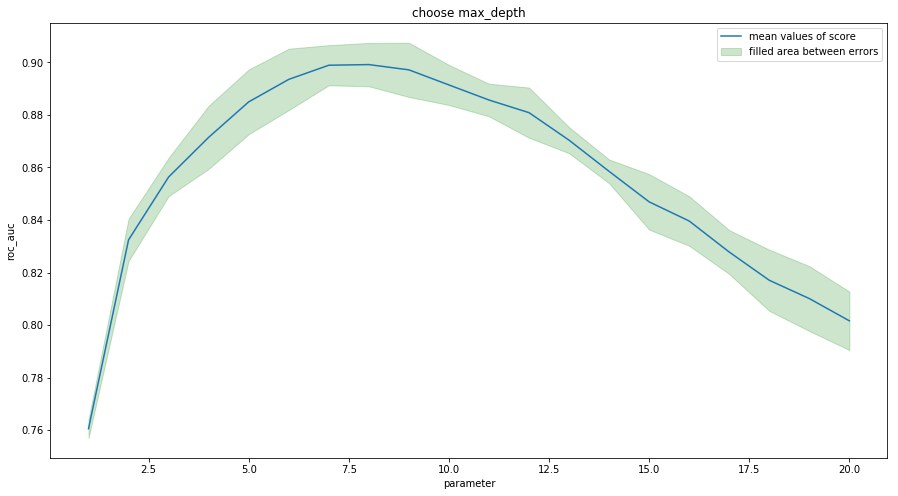

In [17]:
for model, param_name, grid, param_scale in zip(models, 
                                                param_names, 
                                                grids, 
                                                param_scales):
    search_and_draw(X_train, y_train, model, param_name, grid, param_scale)

Подберём параметр n_estimators в алгоритме случайный лес. Известно, что случайный лес почти не переобучается от увеличения количества деревьев. Поэтому график качества будет монотонно возрастать. Следовательно, необходимо найти минимальное значение n_estimators, при котором качество не изменяется. 
Поскольку каждое дерево обучается независимо от остальных, достаточно обучить сразу лес из большого количества деревьев, а затем рассмотреть подмножества нужного размера из исходного множества деревьев.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [19]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [20]:
max_trees = 200

values = np.arange(max_trees) + 1

kf = KFold(n_splits=5, shuffle=True, random_state=1234)

global_scores = []

for train_indices, val_indices in kf.split(X_train):
    scores = []
    
    X_train_kf = X_train[train_indices]
    y_train_kf = y_train[train_indices]
    
    X_val_kf = X_train[val_indices]
    y_val_kf = y_train[val_indices]
    
    forest = RandomForestClassifier(n_estimators=max_trees)
    forest.fit(X_train_kf, y_train_kf)
    trees = forest.estimators_
    
    for number_of_trees in values:
        thinned_forest = RandomForestClassifier(n_estimators=number_of_trees)
        
        thinned_forest.n_classes_ = 2
        thinned_forest.estimators_ = trees[:number_of_trees]

        scores.append(roc_auc_score(y_val_kf, thinned_forest.predict_proba(X_val_kf)[:, 1]))
    
    scores = np.array(scores)
    
    global_scores.append(scores)

global_scores = np.stack(global_scores, axis=0)

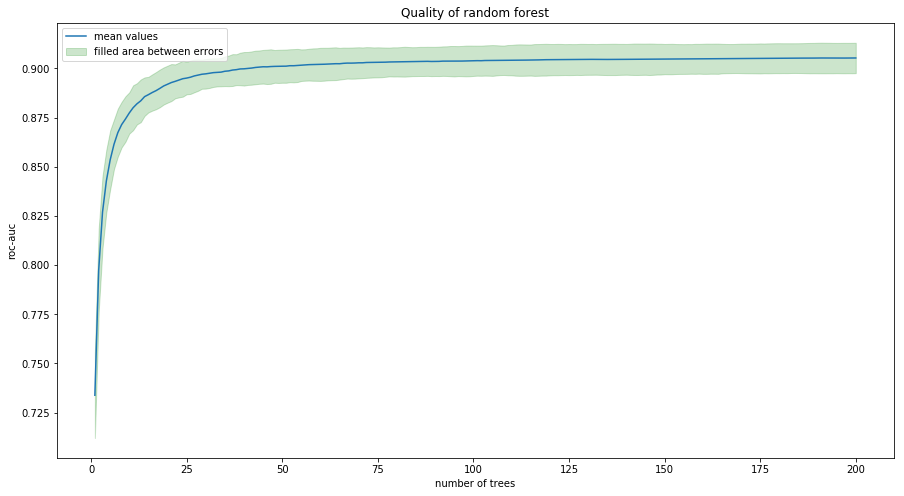

In [21]:
mean_cross_val_score = global_scores.mean(axis=0)
std_cross_val_score = global_scores.std(axis=0)

plt.figure(figsize=(15,8))
plt.title('Quality of random forest')

plt.plot(values, mean_cross_val_score, label='mean values')
plt.fill_between(values, 
                 mean_cross_val_score - 2 * std_cross_val_score, 
                 mean_cross_val_score + 2 * std_cross_val_score, 
                 color='green', 
                 label='filled area between errors', alpha=0.2 )
plt.legend()
plt.xlabel('number of trees')
plt.ylabel('roc-auc')

plt.show()

Нормируем признаки и проделаем тот же эксперимент с алгоритмом ближайших соседей. Посмотрим, изменилось ли качество предсказания.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

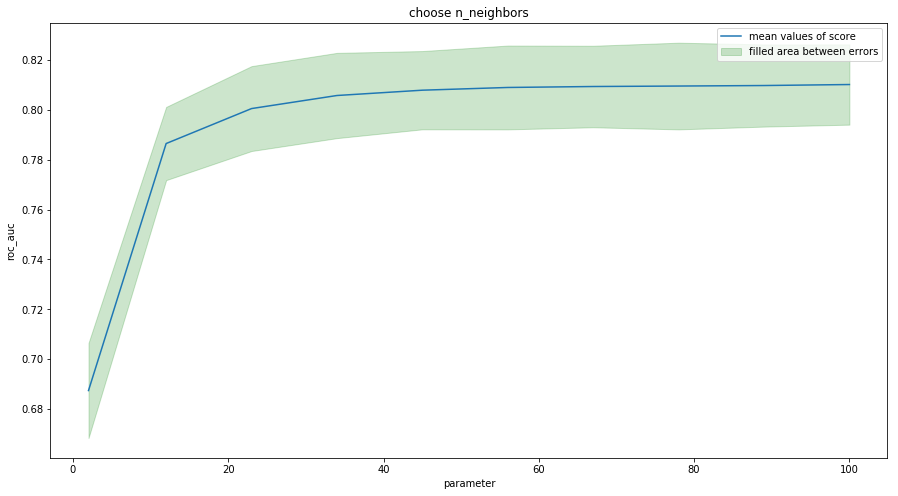

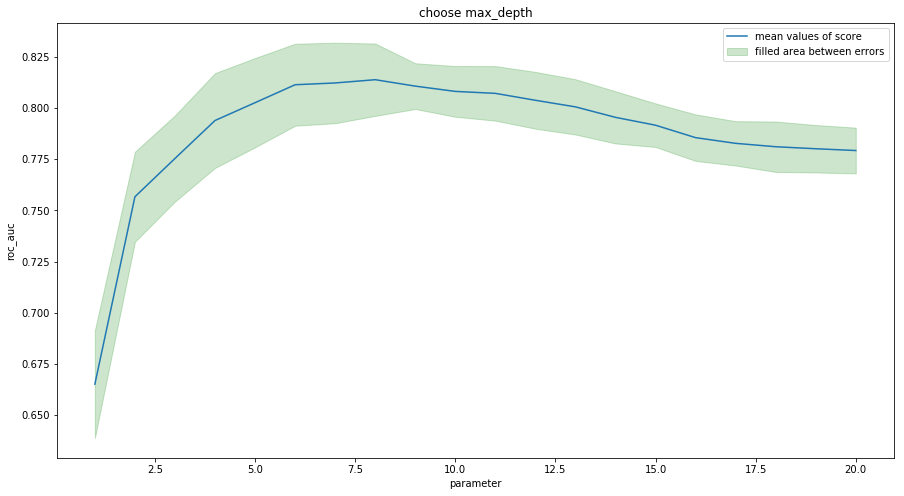

In [23]:
models = [KNeighborsClassifier(), DecisionTreeClassifier()]
param_names = ['n_neighbors', 'max_depth']
grids = [np.array(np.linspace(2, 100, 10), dtype='int'), np.arange(1, 21)]
param_scales = ['ordinary', 'ordinary']

for model, param_name, grid, param_scale in zip(models, 
                                                param_names, 
                                                grids, 
                                                param_scales):
    search_and_draw(X_train[:, numeric_indices], y_train, model, param_name, grid, param_scale)

In [24]:
search_and_draw(X_train, y_train, KNeighborsClassifier(), 'n_neighbors', [30], param_scale, draw=False)

(array([0.87151987]), array([0.00735459]))

#### Корреляционный анализ

Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на маллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.
Есть ли связь между жёсткостью воды и средней годовой смертностью? Посчитайте значение коэффициента корреляции Пирсона между этими признаками, округлите его до четырёх знаков после десятичной точки.

In [25]:
water = pd.read_csv('water.txt', sep = '\t', header = 0)

In [26]:
water.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [27]:
water.shape

(61, 4)

In [28]:
mortalityHardnessCorr = water.iloc[:, -2:].corr()
mortalityHardnessCorr

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [29]:
round(mortalityHardnessCorr.iloc[0, 1], 4)

-0.6548

В предыдущей задаче посчитайте значение коэффициента корреляции Спирмена между средней годовой смертностью и жёсткостью воды. Округлите до четырёх знаков после десятичной точки.

In [30]:
mortalityHardnessCorrSpearman = water.iloc[:, -2:].corr(method = 'spearman')
mortalityHardnessCorrSpearman

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [31]:
round(mortalityHardnessCorrSpearman.iloc[0, 1], 4)

-0.6317

Сохраняется ли связь между признаками, если разбить выборку на северные и южные города? Посчитайте значения корреляции Пирсона между средней годовой смертностью и жёсткостью воды в каждой из двух подвыборок, введите наименьшее по модулю из двух значений, округлив его до четырёх знаков после десятичной точки.

In [32]:
waterSouth = water[water.location == "South"]
waterNorth = water[water.location == "North"]

In [33]:
len(waterSouth)

26

In [34]:
len(waterNorth)

35

In [35]:
mortalityHardnessSouthCorr = waterSouth.iloc[:, -2:].corr()
mortalityHardnessSouthCorr

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [36]:
mortalityHardnessNorthCorr = waterNorth.iloc[:, -2:].corr()
mortalityHardnessNorthCorr

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [37]:
round(min(abs(mortalityHardnessSouthCorr.iloc[0, 1]), abs(mortalityHardnessNorthCorr.iloc[0, 1])), 4)

0.3686

### Больше математики

In [38]:
from scipy import stats

Производитель автомобилей утверждает, что не более 10% их машин небезопасны. Были проверены 15 машин, 3 оказались небезопасны. 

In [39]:
stats.binom_test(3, n=15, p=0.1, alternative='greater')

0.18406106910639114

 **p-уровень значимости, p-критерий** — вероятность получить для данной вероятностной модели распределения значений случайной величины такое же или более экстремальное значение статистики (среднего арифметического, медианы и др.), по сравнению с ранее наблюдаемым, при условии, что нулевая гипотеза верна.

В данном случае нулевая гипотеза не может быть отвергнута при уровне значимости 5%, т.к. полученное p-value выше критической величины.

По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [40]:
round(stats.binom_test(67, 100, 0.75), 4)

0.0822

Представим теперь, что в другой ресторанной сети только 22 из 50 работников испытывают существенный стресс. Гипотеза о том, что 22/50 соответствует 75% по всей популяции, методом, который вы использовали в предыдущей задаче, отвергается.

In [41]:
stats.binom_test(22, 50, 0.75)

3.4831478978300243e-06

#### Множественная проверка гипотез 

Классификатор C4.5 и три его модификации: с оптимизацией гиперпараметра m, гиперпараметра cf и с одновременной оптимизацией обоих гиперпараметров. Эти четыре классификатора сравнивались на 14 наборах данных. На каждом датасете был посчитан AUC каждого классификатора.     
Используя критерий знаковых рангов, необходимо провести попарное сравнение каждого классификатора с каждым. Выбрать два классификатора, различие между которыми наиболее статистически значимо.

In [42]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import pearsonr
from statsmodels.sandbox.stats.multicomp import multipletests 

In [43]:
df = pd.read_csv("AUCs.txt", sep='\t')

In [44]:
df.head(20)

,Unnamed: 0,C4.5,C4.5+m,C4.5+cf,C4.5+m+cf
0,adult (sample),0.763,0.768,0.771,0.798
1,breast cancer,0.599,0.591,0.590,0.569
2,breast cancer wisconsin,0.954,0.971,0.968,0.967
3,cmc,0.628,0.661,0.654,0.657
4,ionosphere,0.882,0.888,0.886,0.898
5,iris,0.936,0.931,0.916,0.931
6,liver disorders,0.661,0.668,0.609,0.685
7,lung cancer,0.583,0.583,0.563,0.625
8,lymphography,0.775,0.838,0.866,0.875
9,mushroom,1.000,1.000,1.000,1.000


In [45]:
p_data = []

for i, lhs_column in enumerate(df.columns[1:]):
    for j, rhs_column in enumerate(df.columns[1:]):
        if i >= j:
            continue
        
        _, p = stats.wilcoxon(df[lhs_column], df[rhs_column])
        p_data.append([lhs_column, rhs_column, p])

In [46]:
df_p = pd.DataFrame.from_records(p_data)
df_p.columns = ['A', 'B', 'p']

In [47]:
df_p.head(10)

,A,B,p
0,C4.5,C4.5+m,0.010757
1,C4.5,C4.5+cf,0.861262
2,C4.5,C4.5+m+cf,0.015906
3,C4.5+m,C4.5+cf,0.046333
4,C4.5+m,C4.5+m+cf,0.327826
5,C4.5+cf,C4.5+m+cf,0.022909


Cтатистически значимые, на уровне 0.05, различия, шт.: 4

Сделаем поправку на множественную проверку. Начнём с метода Холма. Сколько гипотез можно отвергнуть на уровне значимости 0.05 после поправки этим методом?

In [48]:
reject, p_corrected, a1, a2 = multipletests(df_p.p, 
                                            alpha = 0.05, 
                                            method = 'holm') 

In [49]:
df_p['p_corrected'] = p_corrected
df_p['reject'] = reject

In [50]:
df_p.head(10)

,A,B,p,p_corrected,reject
0,C4.5,C4.5+m,0.010757,0.064543,False
1,C4.5,C4.5+cf,0.861262,0.861262,False
2,C4.5,C4.5+m+cf,0.015906,0.079532,False
3,C4.5+m,C4.5+cf,0.046333,0.138998,False
4,C4.5+m,C4.5+m+cf,0.327826,0.655651,False
5,C4.5+cf,C4.5+m+cf,0.022909,0.091636,False


Ответ: 0 гипотез отвергнуто.